In [51]:
import pandas as pd
import numpy as np
import pickle

## Preprocess FIFA data

In [310]:
filename="./fifa data/fifa2020data.csv"
fifa_df=pd.read_csv(filename)

In [311]:
#check data schema
fifa_df.columns[:20]

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club', 'overall', 'potential',
       'value_eur', 'wage_eur', 'player_positions', 'preferred_foot',
       'international_reputation', 'weak_foot', 'skill_moves', 'work_rate'],
      dtype='object')

In [312]:
# # clean currency column
# def currency_cleaner(amount):
#     if amount.endswith('M'):   
#         return float(amount[1:-1])*1e6
#     if amount.endswith('K'):
#         return float(amount[1:-1])*1e3
# fifa_df.Value=fifa_df.Value.apply(currency_cleaner)
# fifa_df.Wage=fifa_df.Wage.apply(currency_cleaner)


In [313]:
# group fifa player data by club and aggregate by averaging to get the club data
team_attributes_df = fifa_df.groupby('club').mean(
)[['overall', 'value_eur', 'wage_eur', 'age', 'potential', 'international_reputation']].sort_values(by='value_eur', ascending=False)

team_attributes_df = team_attributes_df.reset_index()

team_attributes_df

FIFA_club_name = team_attributes_df['club'].unique()

In [314]:
# load transfer data , for future merge use
pkl_file = open('./temporary_pkl/transfer_span_reduced.pkl','rb')
transfer_span_reduced = pickle.load(pkl_file)
pkl_file.close()

In [315]:
network_club_name=list(transfer_span_reduced['club_name'].unique())

# ['Arsenal', 'Stoke City', 'Wolverhampton Wanderers', 'Chelsea',
#        'Newcastle United', 'Fulham', 'West Bromwich Albion',
#        'Manchester United', 'Wigan Athletic', 'Aston Villa',
#        'West Ham United', 'Everton', 'Liverpool', 'Tottenham Hotspur',
#        'Blackburn Rovers', 'Manchester City', 'Sunderland AFC',
#        'Birmingham City', 'Bolton Wanderers', 'Blackpool', 'AC Milan',
#        'AS Roma', 'Brescia Calcio', 'Internazionale', 'Parma', 'GenoaC',
#        'AS Bari', 'SS Lazio', 'Udinese Calcio', 'AFiorentina',
#        'US Palermo', 'Juventus', 'Chievo Verona', 'US Lecce', 'Bologna ',
#        'UC Sampdoria', 'Cagliari Calcio', 'AC Cesena', 'Calcio Catania',
#        'SSC Napoli', 'Girondins Bordeaux', 'AS Monaco',
#        'Olympique Marseille', 'Stade Rennais', 'AJ Auxerre', 'Toulouse',
#        'OGC Nice', 'Paris Saint-Germain', 'AS Saint-Étienne',
#        'Sochaux-Montbéliard', 'RC Lens', 'HSC Montpellier',
#        'Olympique Lyon', 'LOSC Lille', 'Lorient', 'AS Nancy-Lorraine',
#        'SM Caen', 'Valenciennes', 'Stade Brest ',
#        'Athlétic Club Arlésien', 'SL Benfica', 'Sporting CP', 'Porto',
#        'CD Nacional', 'SC Braga', 'Vitória Setúbal', 'CS Marítimo',
#        'SC Beira-Mar', 'Vitória Guimarães SC', 'Rio Ave',
#        'União de Leiria', 'Académica Coimbra', 'Paços de Ferreira',
#        'SC Olhanense', 'Naval º de Maio', 'Portimonense SC',
#        'Borussia Dortmund', 'Bayern Munich', 'Schalke ',
#        'Borussia Mönchengladbach', 'Bayer  Leverkusen', 'VfB Stuttgart',
#        'Hannover ', 'VfL Wolfsburg', 'SV Werder Bremen', '.Nuremberg',
#        'Eintracht Frankfurt', 'TSG  Hoffenheim', 'SC Freiburg',
#        '.FSV Mainz ', 'Hamburger SV', '. Köln', '.Kaiserslautern',
#        'St. Pauli', 'Atlético Madrid', 'Barcelona', 'Real Zaragoza',
#        'RCD Mallorca', 'CA Osasuna', 'Sevilla', 'Real Madrid',
#        'Racing Santander', 'Real Sociedad', 'RCD Espanyol Barcelona',
#        'Deportivo de La Coruña', 'Valencia', 'Villarreal', 'Málaga',
#        'Sporting Gijón', 'UD Almería', 'Levante UD', 'Getafe', 'Hércules',
#        'Athletic Bilbao', 'NAC Breda', 'Roda JC Kerkrade', 'Utrecht',
#        'Groningen', 'Feyenoord Rotterdam', 'SC Heerenveen',
#        'Twente Enschede', 'PSV Eindhoven', 'Willem II Tilburg',
#        'NEC Nijmegen', 'Vitesse Arnhem', 'Ajax Amsterdam',
#        'De Graafschap Doetinchem', 'SBV Excelsior Rotterdam',
#        'AZ Alkmaar', 'ADO Den Haag', 'Heracles Almelo', 'VVV-Venlo',
#        'Queens Park Rangers', 'Norwich City', 'Swansea City',
#        'Atalanta BC', 'AC Siena', 'Novara Calcio ', 'AC Ajaccio',
#        'FCO Dijon', 'Évian Thonon Gaillard', 'Gil Vicente', 'CD Feirense',
#        'Augsburg', 'Hertha BSC', 'Real Betis Balompié', 'Rayo Vallecano',
#        'Granada', 'RKC Waalwijk', 'Southampton', 'Reading',
#        'Delfino Pescara ', 'Torino', 'SC Bastia', 'ES Troyes AC',
#        'Stade Reims', 'GD Estoril', 'Moreirense', 'SpVgg Greuther Fürth',
#        'Fortuna Düsseldorf', 'Real Valladolid', 'Celta de Vigo',
#        'PEC Zwolle', 'Cardiff City', 'Hull City', 'Crystal Palace',
#        'Hellas Verona', 'AS Livorno', 'US Sassuolo', 'EA Guingamp',
#        'Nantes', 'Belenenses SAD', 'Arouca', 'Eintracht Braunschweig',
#        'Elche', 'SC Cambuur-Leeuwarden', 'Go Ahead Eagles Deventer',
#        'Burnley', 'Leicester City', 'Empoli', 'Inter Milan', 'Metz',
#        'Penafiel', 'Boavista Porto', 'SC Paderborn ', 'SD Eibar',
#        'Córdoba', 'Dordrecht', 'ABournemouth', 'Watford', 'Carpi ',
#        'Frosinone Calcio', 'SCO Angers', 'GAjaccio', 'CD Tondela',
#        'União Madeira', 'Ingolstadt ', 'SV Darmstadt ', 'UD Las Palmas',
#        'Middlesbrough', 'Crotone', 'GD Chaves', 'RB Leipzig',
#        'Deportivo Alavés', 'CD Leganés', 'Sparta Rotterdam',
#        'Brighton & Hove Albion', 'Huddersfield Town', 'Benevento Calcio',
#        'SPAL ', 'SC Amiens', 'RC Strasbourg Alsace', 'Desportivo Aves',
#        'Girona', 'Parma Calcio ', 'SPAL', 'Nîmes Olympique',
#        'CD Santa Clara', 'SD Huesca', 'Emmen', 'Fortuna Sittard',
#        'Sheffield United', 'Famalicão', '.Union Berlin']

#len(list(transfer_span_reduced['club_name'].unique()))=224
#len(set(network_club_name))=224 , thus no duplicate

In [316]:
missing_club=[club for club in network_club_name if not(club in  FIFA_club_name)]

In [317]:
len(missing_club),len(network_club_name)  # 

(129, 224)

In [318]:
# the following clubs don't have the same name as appears in FIFA data, thus they will be missing while merging
# two datasets
missing_club

['Sunderland AFC',
 'AC Milan',
 'AS Roma',
 'Brescia Calcio',
 'Internazionale',
 'GenoaC',
 'AS Bari',
 'SS Lazio',
 'Udinese Calcio',
 'AFiorentina',
 'US Palermo',
 'US Lecce',
 'Bologna ',
 'UC Sampdoria',
 'Cagliari Calcio',
 'AC Cesena',
 'Calcio Catania',
 'SSC Napoli',
 'Girondins Bordeaux',
 'Olympique Marseille',
 'Stade Rennais',
 'Toulouse',
 'Sochaux-Montbéliard',
 'RC Lens',
 'HSC Montpellier',
 'Olympique Lyon',
 'Lorient',
 'AS Nancy-Lorraine',
 'SM Caen',
 'Valenciennes',
 'Stade Brest ',
 'Athlétic Club Arlésien',
 'Porto',
 'CD Nacional',
 'Vitória Setúbal',
 'CS Marítimo',
 'SC Beira-Mar',
 'Vitória Guimarães SC',
 'Rio Ave',
 'União de Leiria',
 'Académica Coimbra',
 'Paços de Ferreira',
 'SC Olhanense',
 'Naval º de Maio',
 'Bayern Munich',
 'Schalke ',
 'Bayer  Leverkusen',
 'Hannover ',
 '.Nuremberg',
 'TSG  Hoffenheim',
 '.FSV Mainz ',
 '. Köln',
 '.Kaiserslautern',
 'St. Pauli',
 'Barcelona',
 'Sevilla',
 'RCD Espanyol Barcelona',
 'Valencia',
 'Villarreal',


In [319]:
#fuzzywuzzy is a package which allows to do fuzzy match . It is useful to match club names in different schema
from fuzzywuzzy import process
choices=FIFA_club_name
process.extractOne('Bayer  Leverkusen', choices)

('Bayer 04 Leverkusen', 95)

In [320]:
def rename(club,choices):
    if club in choices:
        return club 
    else:
        return process.extractOne(club, choices)[0]

In [321]:
#len(new_name)=282  ,  29.5 seconds
new_name=[rename(club,choices) if not (club in FIFA_club_name) else club for club in list(transfer_span_reduced['club_name'].unique())  ]

In [322]:
len(set(new_name)),len(new_name)  #there is duplicates in new_name

(197, 224)

In [323]:
# for fifa data, we only select clubs appeared in the network of 7 major clubs , we get 197 of them 
fifa_df_reduced=fifa_df[fifa_df['club'].isin(new_name)]

In [324]:
# attributes_df will be used for machine learning, each row is composed of 
#|score_list  of player score| overall|value_eur|538 score
score_list_df=fifa_df_reduced.groupby('club')['overall'].apply(list).reset_index(name='score_list')
attributes_df=pd.merge(score_list_df,team_attributes_df[['overall','value_eur','club']],how='left',left_on='club',right_on='club')
attributes_df

,club,score_list,overall,value_eur
0,1. FC Kaiserslautern,"[69, 68, 68, 67, 67, 66, 66, 66, 66, 65, 65, 6...",63.750000,6.039286e+05
1,1. FC Köln,"[81, 79, 79, 78, 77, 76, 76, 76, 75, 75, 75, 7...",71.612903,5.360000e+06
2,1. FC Union Berlin,"[77, 75, 74, 73, 73, 73, 73, 73, 72, 72, 72, 7...",68.787879,2.206970e+06
3,1. FSV Mainz 05,"[78, 78, 78, 77, 75, 75, 75, 75, 75, 75, 74, 7...",69.969697,4.636364e+06
4,AC Ajaccio,"[70, 69, 68, 68, 68, 68, 66, 66, 65, 64, 63, 6...",62.458333,4.556250e+05
...,...,...,...,...
192,West Ham United,"[84, 83, 82, 81, 80, 79, 79, 79, 78, 78, 78, 7...",72.575758,8.412576e+06
193,Wigan Athletic,"[71, 71, 70, 70, 70, 70, 70, 69, 69, 69, 69, 6...",66.166667,9.980000e+05
194,Willem II,"[71, 71, 70, 69, 69, 68, 68, 67, 67, 66, 66, 6...",64.681818,9.177273e+05
195,Wolfsberger AC,"[71, 69, 69, 68, 66, 66, 66, 66, 66, 65, 65, 6...",62.961538,5.176923e+05


In [325]:
#introduce club score data scraped from https://projects.fivethirtyeight.com/global-club-soccer-rankings/
pkl_file = open('./temporary_pkl/club_score_df.pkl','rb')
club_score_df = pickle.load(pkl_file)
pkl_file.close()

### Step: Merge club_score_df and attributes_df(FIFA)

In [326]:
# we can not direct merge the two DataFrame based on club name, because they dont have the same name schema
# We need to first standardize the club name of club_score_df



In [327]:
# It takes 59.3s to run this line of code. Rename the club name of score DataFrame. PSG is speical beacuse it's
# abbreviation, thus fuzzywuzzy can not deal with it. But the rest is fine
club_score_df['club']=club_score_df['club'].apply(lambda x:'Paris Saint-Germain' if x=='PSG' else rename(x,choices))

In [328]:
# A default of using Fuzzywuzzy it's it may attribute one club name to several club names that appears similar
# In this case, a simple but aggressive solution is to drop all duplicates row and only keep the first . This is not that bad because:
# 1.The chance to have duplicates is low 2.  Duplicates only appears for the clubs in very low ranking(out of 120)
# This solution will let us lose around 15 small clubs
club_score_df[club_score_df['club']=='PSV']

,club,score
92,PSV,63.5


In [329]:
club_score_df

,club,score
0,Liverpool,94.1
1,Manchester City,93.9
2,FC Bayern München,93.4
3,Paris Saint-Germain,90.5
4,Real Madrid,90.1
...,...,...
523,Pachuca,22.9
528,Blackpool,22.3
541,Academica Clinceni,21.0
544,Stade Rennais FC,20.7


In [330]:
# dupllicated club name appears
club_score_df[club_score_df.duplicated('club')].head(15)

,club,score
60,Athletic Club de Bilbao,67.5
247,FC Porto,45.1
252,RC Strasbourg Alsace,44.7
342,Deportivo Alavés,37.8
498,Roma,24.9
502,Athletic Club de Bilbao,24.5
511,SPAL,23.8


In [331]:
# drop duplciate rows and only keep the first occurence
club_score_df=club_score_df.drop_duplicates('club',keep='first')
club_score_df.rename(columns={'score':'538_score'},inplace=True)

/Users/Saibo/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [332]:
attributes_df

,club,score_list,overall,value_eur
0,1. FC Kaiserslautern,"[69, 68, 68, 67, 67, 66, 66, 66, 66, 65, 65, 6...",63.750000,6.039286e+05
1,1. FC Köln,"[81, 79, 79, 78, 77, 76, 76, 76, 75, 75, 75, 7...",71.612903,5.360000e+06
2,1. FC Union Berlin,"[77, 75, 74, 73, 73, 73, 73, 73, 72, 72, 72, 7...",68.787879,2.206970e+06
3,1. FSV Mainz 05,"[78, 78, 78, 77, 75, 75, 75, 75, 75, 75, 74, 7...",69.969697,4.636364e+06
4,AC Ajaccio,"[70, 69, 68, 68, 68, 68, 66, 66, 65, 64, 63, 6...",62.458333,4.556250e+05
...,...,...,...,...
192,West Ham United,"[84, 83, 82, 81, 80, 79, 79, 79, 78, 78, 78, 7...",72.575758,8.412576e+06
193,Wigan Athletic,"[71, 71, 70, 70, 70, 70, 70, 69, 69, 69, 69, 6...",66.166667,9.980000e+05
194,Willem II,"[71, 71, 70, 69, 69, 68, 68, 67, 67, 66, 66, 6...",64.681818,9.177273e+05
195,Wolfsberger AC,"[71, 69, 69, 68, 66, 66, 66, 66, 66, 65, 65, 6...",62.961538,5.176923e+05


In [333]:
# update attribute_df(add 538score)
attributes_df=pd.merge(club_score_df,attributes_df,left_on='club',right_on='club',how='right')

In [334]:
attributes_df

,club,538_score,score_list,overall,value_eur
0,Liverpool,94.1,"[90, 90, 89, 88, 86, 85, 85, 84, 83, 83, 82, 8...",75.848485,2.100803e+07
1,Manchester City,93.9,"[91, 89, 88, 88, 88, 87, 87, 87, 86, 85, 84, 8...",77.000000,2.562864e+07
2,FC Bayern München,93.4,"[89, 88, 87, 86, 86, 86, 85, 85, 84, 84, 84, 8...",81.304348,2.994674e+07
3,Paris Saint-Germain,90.5,"[92, 89, 88, 87, 86, 86, 86, 83, 83, 83, 82, 8...",75.909091,2.083485e+07
4,Real Madrid,90.1,"[91, 90, 89, 88, 88, 87, 87, 87, 86, 85, 85, 8...",80.121212,2.720758e+07
...,...,...,...,...,...
192,Hellas Verona,NaN,"[77, 76, 75, 75, 75, 74, 74, 74, 73, 73, 72, 7...",69.787879,2.782424e+06
193,RSC Anderlecht,NaN,"[83, 78, 77, 76, 75, 75, 75, 75, 74, 73, 73, 7...",71.642857,4.516071e+06
194,Racing Club,NaN,"[81, 80, 79, 78, 78, 78, 78, 77, 77, 76, 75, 7...",72.107143,4.733036e+06
195,Standard de Liège,NaN,"[77, 75, 74, 74, 73, 73, 73, 73, 73, 72, 72, 7...",71.250000,3.408393e+06


In [335]:
# There is 13 rows with NaN
attributes_df[attributes_df['538_score'].isna()].head()

,club,538_score,score_list,overall,value_eur
185,1. FC Kaiserslautern,NaN,"[69, 68, 68, 67, 67, 66, 66, 66, 66, 65, 65, 6...",63.750000,6.039286e+05
186,Angers SCO,NaN,"[78, 76, 75, 75, 75, 75, 74, 74, 74, 74, 73, 7...",69.258065,3.225000e+06
187,Bolton Wanderers,NaN,"[68, 68, 67, 66, 66, 62, 59, 59, 57, 56, 55, 5...",56.086957,2.756522e+05
188,CF Fuenlabrada,NaN,"[70, 68, 68, 67, 67, 67, 66, 66, 65, 65, 65, 6...",64.413793,5.451724e+05
189,Central Córdoba,NaN,"[72, 71, 70, 67, 67, 66, 66, 65, 65, 64, 63, 6...",63.428571,5.983929e+05


In [336]:
# Fill Nan by the min value of 538 score in the dataframe, because these club are ranked at very end.
attributes_df['538_score']=attributes_df['538_score'].astype('float')
min_sc=attributes_df['538_score'].min()
fill_values=np.linspace(min_sc,min_sc-5,13)
attributes_df['538_score'].fillna(value=min_sc,inplace=True)

In [337]:
# Now the dataframe is ready for doing machine learning to predict the 538_score
attributes_df.head(10)

,club,538_score,score_list,overall,value_eur
0,Liverpool,94.1,"[90, 90, 89, 88, 86, 85, 85, 84, 83, 83, 82, 8...",75.848485,2.100803e+07
1,Manchester City,93.9,"[91, 89, 88, 88, 88, 87, 87, 87, 86, 85, 84, 8...",77.000000,2.562864e+07
2,FC Bayern München,93.4,"[89, 88, 87, 86, 86, 86, 85, 85, 84, 84, 84, 8...",81.304348,2.994674e+07
3,Paris Saint-Germain,90.5,"[92, 89, 88, 87, 86, 86, 86, 83, 83, 83, 82, 8...",75.909091,2.083485e+07
4,Real Madrid,90.1,"[91, 90, 89, 88, 88, 87, 87, 87, 86, 85, 85, 8...",80.121212,2.720758e+07
5,FC Barcelona,89.0,"[94, 90, 89, 89, 89, 88, 87, 86, 86, 85, 85, 8...",78.363636,2.634242e+07
6,RB Leipzig,86.3,"[85, 83, 83, 82, 81, 81, 81, 80, 79, 79, 78, 7...",73.878788,1.159879e+07
7,Atlético Madrid,86.1,"[91, 85, 85, 85, 84, 83, 83, 83, 82, 82, 82, 8...",76.181818,1.789015e+07
8,Chelsea,85.0,"[89, 84, 84, 83, 82, 82, 82, 82, 82, 81, 80, 8...",77.060606,1.530212e+07
9,Juventus,85.0,"[93, 89, 88, 86, 86, 86, 85, 85, 85, 85, 84, 8...",80.060606,2.228712e+07


In [338]:

pkl_file = open('./temporary_pkl/fifa_data.pkl','wb')
pickle.dump(attributes_df,pkl_file)
pkl_file.close()

## Machine learning part

In [352]:
pkl_file = open('./temporary_pkl/fifa_data.pkl','rb')
attributes_df = pickle.load(pkl_file)
pkl_file.close()

In [353]:
attributes_df[110:120]

,club,538_score,score_list,overall,value_eur
110,Rio Ave FC,50.4,"[74, 74, 73, 73, 73, 72, 72, 71, 70, 70, 70, 7...",68.666667,2.000000e+06
111,VfB Stuttgart,50.2,"[78, 76, 76, 75, 75, 75, 75, 74, 73, 73, 73, 7...",69.200000,3.398000e+06
112,Lecce,50.0,"[75, 73, 73, 73, 72, 72, 72, 71, 71, 70, 70, 7...",66.272727,1.410606e+06
113,Toulouse Football Club,49.3,"[79, 77, 77, 76, 75, 75, 75, 75, 73, 72, 72, 7...",69.068966,3.660000e+06
114,Middlesbrough,49.0,"[75, 74, 73, 72, 72, 72, 72, 71, 71, 70, 69, 6...",64.633333,1.518000e+06
115,Cardiff City,48.9,"[76, 75, 74, 74, 74, 73, 73, 73, 73, 73, 72, 7...",68.533333,2.363333e+06
116,Swansea City,48.6,"[76, 75, 73, 73, 72, 72, 72, 72, 72, 71, 70, 7...",67.066667,2.067667e+06
117,Hamburger SV,48.2,"[76, 76, 74, 74, 74, 74, 74, 74, 73, 73, 72, 7...",69.800000,3.188667e+06
118,FC Lorient,47.8,"[73, 73, 73, 72, 72, 72, 71, 69, 69, 68, 68, 6...",65.965517,1.482759e+06
119,Reading,47.6,"[74, 73, 73, 73, 72, 72, 72, 71, 71, 71, 70, 6...",67.133333,1.870333e+06


In [359]:
attributes_df=attributes_df[attributes_df['score_list'].apply(len).sort_values()!=1]

/Users/Saibo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [360]:
# Choose just the 21 (n_players) best player scores for each team

n_players = min(attributes_df.score_list.apply(len))
n_clubs = attributes_df.index.size
def filter_top(x):
    x.sort()
    x = x[::-1].copy()
    return x[:n_players]

attributes_df.score_list = attributes_df.score_list.apply(filter_top)

/Users/Saibo/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [372]:
attributes_df[65:70]

,club,538_score,score_list,overall,value_eur
65,1. FC Union Berlin,64.2,"[77, 75, 74, 73, 73, 73, 73, 73, 72, 72, 72, 7...",68.787879,2.206970e+06
66,Bologna,64.1,"[78, 77, 77, 76, 76, 76, 76, 76, 75, 75, 75, 7...",71.903226,4.812742e+06
67,Sporting CP,64.0,"[85, 82, 82, 82, 81, 81, 79, 78, 77, 77, 77, 7...",74.900000,9.367500e+06
68,SC Freiburg,63.9,"[78, 78, 76, 76, 75, 75, 75, 75, 75, 73, 73, 7...",70.419355,3.797419e+06
69,Levante UD,63.8,"[82, 80, 78, 78, 78, 77, 77, 77, 76, 76, 76, 7...",72.875000,6.258594e+06


In [362]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

In [370]:
X_train

array([list([85, 84, 81, 81, 80, 79, 79, 79, 78, 78, 78, 78, 78, 77, 77, 76, 76, 75, 74, 73, 70]),
       list([75, 74, 74, 74, 74, 73, 73, 73, 73, 72, 72, 72, 72, 70, 70, 70, 69, 69, 69, 69, 68]),
       list([70, 70, 69, 69, 69, 69, 69, 68, 68, 68, 66, 66, 66, 66, 66, 65, 64, 64, 64, 63, 63]),
       list([77, 76, 74, 74, 73, 73, 72, 72, 71, 70, 70, 68, 67, 67, 66, 66, 64, 60, 59, 57, 56]),
       list([83, 83, 82, 82, 81, 80, 80, 80, 80, 79, 79, 78, 78, 76, 75, 75, 75, 74, 74, 72, 71]),
       list([82, 82, 80, 78, 78, 78, 77, 77, 76, 76, 76, 76, 75, 75, 74, 74, 74, 74, 74, 73, 73]),
       list([74, 73, 73, 73, 72, 72, 72, 71, 71, 71, 70, 69, 69, 69, 68, 68, 68, 67, 66, 66, 66]),
       list([72, 72, 71, 71, 71, 70, 70, 70, 69, 69, 69, 69, 68, 68, 68, 68, 67, 67, 67, 67, 66]),
       list([76, 76, 75, 74, 72, 72, 72, 71, 71, 70, 70, 69, 69, 69, 68, 68, 68, 67, 67, 66, 66]),
       list([77, 76, 75, 75, 75, 74, 74, 73, 73, 73, 73, 72, 72, 72, 72, 71, 71, 70, 69, 69, 68]),
       lis

In [398]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(attributes_df.score_list.values, attributes_df['538_score'], test_size=0.35, random_state=27)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.52, random_state=27)

print(X_train[68])
class ClubsDataset(Dataset):
    def __init__(self, mode='training', transform=None):
        if mode == 'training':
            self.X = X_train
            self.y = y_train
        elif mode == 'validation':
            self.X = X_valid
            self.y = y_valid
        elif mode == 'test':
            self.X = X_test
            self.y = y_test
        else:
            raise Exception('Invalid mode!')
        print(self.X[68])
        
    def __len__(self):
        return len(self.y)
    
    def __getitem__(self, index):
        return torch.tensor(self.X[index]), self.y[index]

train_dataset = ClubsDataset(mode='training')
train_dataset.__getitem__(68)

[76, 74, 74, 73, 73, 72, 72, 72, 72, 71, 71, 70, 70, 69, 69, 68, 67, 67, 67, 67, 67]
[76, 74, 74, 73, 73, 72, 72, 72, 72, 71, 71, 70, 70, 69, 69, 68, 67, 67, 67, 67, 67]


KeyError: 68

In [375]:
y_train

127

In [365]:
# Funções auxiliares para lidar com os parametros

def get_trainable(model_params):
    return (p for p in model_params if p.requires_grad)

def get_frozen(model_params):
    return (p for p in model_params if not p.requires_grad)

def all_trainable(model_params):
    return all(p.requires_grad for p in model_params)

def all_frozen(model_params):
    return all(not p.requires_grad for p in model_params)

def freeze_all(model_params):
    for param in model_params:
        param.requires_grad = False

In [380]:
len(train_dataset),len(X_train)

(127, 127)

In [385]:
X_train[68]

[76,
 74,
 74,
 73,
 73,
 72,
 72,
 72,
 72,
 71,
 71,
 70,
 70,
 69,
 69,
 68,
 67,
 67,
 67,
 67,
 67]

In [366]:

batch_size = n_clubs

train_dataset = ClubsDataset(mode='training')
valid_dataset = ClubsDataset(mode='validation')
test_dataset = ClubsDataset(mode='test')

train_dataloader = DataLoader(train_dataset, batch_size, shuffle=True, num_workers=0)
valid_dataloader = DataLoader(valid_dataset, batch_size, shuffle=False, num_workers=0)
test_dataloader = DataLoader(test_dataset, batch_size=n_clubs, shuffle=False, num_workers=0)

In [367]:
n_hidden1 = 10000
n_hidden2 = 1000

class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(n_players, n_hidden1),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(n_hidden1, n_hidden2),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(n_hidden2, 1)
        )

    def forward(self, x):
        # x = x.view(x.size(0), -1)
        x = self.layers(x)
        return x

In [369]:
for i, (X, y) in enumerate(train_dataloader):
    print(i, X, y)

KeyError: 68

In [393]:
# del model, X, y, y_, loss

lr = 0.0002

model = MLP()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(get_trainable(model.parameters()), lr=lr)

max_valid_acc = 0.
n = 0

n_max = 100

while n < n_max:
    # Train
    model.train();
    
    running_loss = 0.
    #correct = 0
    
    for i, (X, y) in enumerate(train_dataloader):
        y_ = model(X.float())
        optimizer.zero_grad()
        loss = criterion(y_, y)
        loss.backward()
        optimizer.step()
        
        # Statistics
        _, y_label_ = torch.max(y_, 1)
        running_loss += loss.item()*batch_size

    train_loss = running_loss / len(train_dataloader.dataset)
    
    print(f'--------- Epoch: {n} ---------')
    print(f'Train Loss: {round(train_loss,3)}')

    
    # Eval
    model.eval();
    
    running_loss = 0.
    #correct = 0
    
    with torch.no_grad():
        for i, (X, y) in enumerate(valid_dataloader):
            y_ = model(X.float());
        
            # Statistics
            _, y_label_ = torch.max(y_, 1)
            loss = criterion(y_, y)
            running_loss += loss.item() * X.shape[0]
            
        valid_loss = running_loss / len(valid_dataloader.dataset)
        
        print(f'Valid Loss: {round(valid_loss,3)}')
         
    n += 1

AttributeError: 'DataLoader' object has no attribute 'X'

In [24]:
# Final accuracy test
model.eval();

running_loss = 0.
correct = 0

with torch.no_grad():
    for i, (X, y) in enumerate(test_dataloader):
        print(i)
        y_ = model(X.float());
        # Statistics

        loss = criterion(y_, y)
#         plt.hist(loss)
#         running_loss += loss.item() * X.shape[0]

#     test_loss = running_loss / len(test_dataloader.dataset)
#     test_acc = 100 * correct/len(test_dataloader.dataset)

#     print(f'Test Loss: {round(test_loss,3)}')
#     print(f'Test Acc:  {round(test_acc,1)} %')

0


/Users/Saibo/anaconda3/lib/python3.7/site-packages/torch/nn/modules/loss.py:431: UserWarning: Using a target size (torch.Size([36])) that is different to the input size (torch.Size([36, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


(array([ 2.,  1.,  1.,  0.,  2.,  1.,  1.,  3.,  5., 20.]),
 array([-22.46023746, -19.89550796, -17.33077847, -14.76604897,
        -12.20131947,  -9.63658997,  -7.07186048,  -4.50713098,
         -1.94240148,   0.62232802,   3.18705751]),
 <a list of 10 Patch objects>)

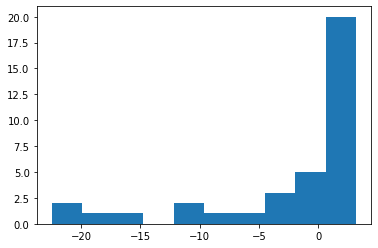

In [25]:
plt.hist(y_.flatten().numpy()- y_test)

In [26]:
print(loss)

tensor(59.3416)
